In [1]:
import GPy 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

{'covariance': [<matplotlib.contour.QuadContourSet at 0x1200a5400>]}

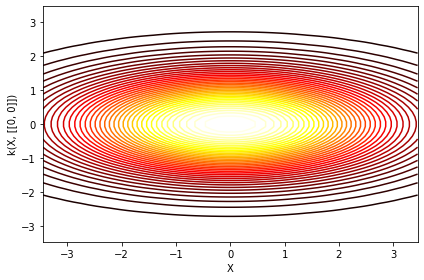

In [33]:
k1 = GPy.kern.ExpQuad(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=2, active_dims=[1]) # works on the second column of X, index=1

k3 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[0]) # works on the first column of X, index=0
k4 = GPy.kern.ExpQuad(input_dim=1, lengthscale=0.5, active_dims=[1]) # works on the second column of X, index=1

k = k1 * k2  
k.plot(x=np.array([[0,0]]) , resolution=50, levels=40, projection='2d', alpha=1)

In [12]:
??k.plot_covariance

In [5]:
xx, yy = np.mgrid[-3:3:10j, -3:3:10j]
X = np.vstack((xx.flatten(), yy.flatten())).T

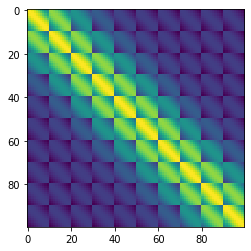

In [8]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=2,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=4, variance=2, active_dims=[1]) # works on the second column of X, index=1
k = k1*k2 + k1 + k2
plt.imshow(k.K(X))

In [10]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=1,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=2, variance=4, active_dims=[1]) # works on the second column of X, index=1
k_mult_1 = k1*k2
k1 = GPy.kern.RBF(input_dim=1, lengthscale=1, variance=2,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=2, variance=2, active_dims=[1]) # works on the second column of X, index=1
k_mult_2 = k1*k2

(k_mult_1.K(X) - k_mult_2.K(X)).sum()

0.0

In [11]:
GPy.kern.RBF?

In [16]:
k1 = GPy.kern.RBF(input_dim=1, lengthscale=2,  active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.RBF(input_dim=1, lengthscale=3, active_dims=[1]) # works on the second column of X, index=1
k_mult = k1*k2
k_add = k1 + k2

In [13]:
z_mult = np.random.multivariate_normal(np.zeros(X.shape[0]), 2*k_mult.K(X))
z_add = np.random.multivariate_normal(np.zeros(X.shape[0]), 2*k_add.K(X))

NameError: name 'k_add' is not defined

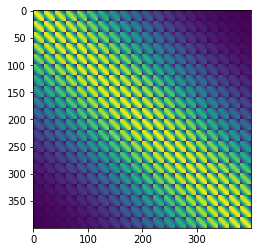

In [14]:
plt.imshow(k_mult.K(X))

In [15]:
plt.imshow(k_add.K(X))

NameError: name 'k_add' is not defined

Multiplicative kernel with additive data

In [ ]:
k_mult_add = k1*k2
m_mult_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_mult_add)
m_mult_add.optimize_restarts(verbose=False)
plt.imshow(k_mult_add.K(X))

Multiplicative kernel with multiplicative data

In [ ]:
k_mult_mult = k1*k2

m_mult_mult = GPy.models.GPRegression(X, Y=z_mult[:, np.newaxis], kernel=k_mult_mult)
m_mult_mult.optimize_restarts(verbose=False)
plt.imshow(k_mult_mult.K(X))

In [ ]:
k_mult_mult_add = k1*k2 + k1 + k2

m_mult_mult_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_mult_mult_add)
m_mult_mult_add.optimize_restarts(verbose=False)
plt.imshow(k_mult_mult_add.K(X))

In [ ]:
m_mult_mult_add

Additive kernel with additive data

In [ ]:
k_add_add = k1 + k2

m_add_add = GPy.models.GPRegression(X, Y=z_add[:, np.newaxis], kernel=k_add_add)
m_add_add.optimize_restarts(verbose=False)
plt.imshow(k_add_add.K(X))

Additive kernel with multiplicative data

In [ ]:
k_add_mult = k1 + k2

m_add_mult = GPy.models.GPRegression(X, Y=z_mult[:, np.newaxis], kernel=k_add_mult)
m_add_mult.optimize_restarts(verbose=False)
plt.imshow(k_add_mult.K(X))

In [ ]:
def rmsd(m, Xnew=X):
    y_pred, _ = m.predict(Xnew)
    y_obs = m.Y
    return np.sqrt(np.sum((y_pred-y_obs)**2))

In [ ]:
print(rmsd(m_mult_mult)*100)
print(rmsd(m_mult_add)*100)
print(rmsd(m_add_mult)*100)
print(rmsd(m_add_add)*100)
print(rmsd(m_mult_mult_add)*100)

In [ ]:
m_mult_mult

In [ ]:
m_mult_add